# Proyecto de Machine Learning para predecir el Indice de Similitud de la Tierra (IST) de diferentes exoplanetas descubiertos

##### Importamos librerias

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

### Cargamos el dataset el cual proviene de la url https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

In [2]:
data = pd.read_csv('Exoplanets.csv', header=1)

data.sample(5)

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
4380,Kepler-985 b,Kepler-985,1,1,Transit,2016,Kepler,0,116.331901,0.001381,-0.001381,0.0,0.4451,NaN,NaN,0.0,2.980,0.140,-0.150,0.0,0.266,0.012,-0.013,0.0,9.17000,NaN,NaN,0.0,0.02880,NaN,NaN,0.0,M-R relationship,0.000,NaN,NaN,0.0,2.59,0.75,-0.45,0.0,323.0,NaN,NaN,0.0,0,NaN,5434.0,75.03,-61.79,0.0,0.85,0.03,-0.03,0.0,0.91,0.03,-0.04,0.0,0.00,0.098,-0.111,0.0,[Fe/H],4.54,0.02,-0.03,0.0,19h20m34.64s,290.144339,+44d02m59.57s,44.049881,679.361,9.344,-9.097,14.904,0.195,-0.195,13.019,0.026,-0.026,14.7169,0.000353,-0.000353
4817,WASP-156 b,WASP-156,1,1,Transit,2017,SuperWASP,0,3.836169,0.000003,-0.000003,0.0,0.0453,0.00090,-0.00090,0.0,5.717,0.224,-0.224,0.0,0.510,0.020,-0.020,0.0,40.68224,3.1783,-2.86047,0.0,0.12800,0.01,-0.009,0.0,Mass,0.007,NaN,NaN,1.0,150.00,10.00,-10.00,0.0,970.0,30.0,-20.0,0.0,0,K3,4910.0,61.00,-61.00,0.0,0.76,0.03,-0.03,0.0,0.84,0.05,-0.05,0.0,0.24,0.120,-0.120,0.0,[Fe/H],4.60,0.04,-0.07,0.0,02h11m07.70s,32.782085,+02d25m05.50s,2.418194,122.066,0.648,-0.641,11.559,0.019,-0.019,9.339,0.023,-0.023,11.3227,0.000858,-0.000858
4518,OGLE-2016-BLG-1067L b,OGLE-2016-BLG-1067L,1,1,Microlensing,2019,OGLE,0,NaN,NaN,NaN,NaN,1.7000,0.38000,-0.39000,0.0,14.300,NaN,NaN,0.0,1.280,NaN,NaN,0.0,140.00000,67.0000,-54.00000,0.0,0.43000,0.21,-0.170,0.0,Mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,0.15,-0.12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18h12m49.08s,273.204500,-27d00m45.5s,-27.012639,3730.000,660.000,-670.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4832,WASP-17 b,WASP-17,1,1,Transit,2009,SuperWASP,0,3.735430,0.000008,-0.000008,0.0,0.0515,0.00034,-0.00034,0.0,20.961,2.690,-2.690,0.0,1.870,0.240,-0.240,0.0,247.90740,73.1009,-73.10090,0.0,0.78000,0.23,-0.230,0.0,Mass,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1755.0,28.0,-28.0,0.0,0,F4,6550.0,100.00,-100.00,0.0,1.49,0.19,-0.19,0.0,2.28,0.99,-0.99,0.0,-0.25,NaN,NaN,0.0,[Fe/H],4.20,0.20,-0.20,0.0,15h59m50.94s,239.962248,-28d03m42.46s,-28.061794,405.908,8.779,-8.421,11.588,0.015,-0.015,10.224,0.027,-0.027,11.3803,0.000982,-0.000982
1230,K2-162 b,K2-162,1,1,Transit,2018,K2,0,9.458890,0.001040,-0.001070,0.0,0.0795,0.00060,-0.00060,0.0,1.440,0.110,-0.070,0.0,0.128,0.010,-0.006,0.0,2.67000,NaN,NaN,0.0,0.00839,NaN,NaN,0.0,M-R relationship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,631.0,8.0,-8.0,0.0,0,NaN,4842.0,49.00,-45.00,0.0,0.69,0.01,-0.01,0.0,0.75,0.02,-0.02,0.0,-0.17,0.050,-0.060,0.0,[Fe/H],4.63,0.01,-0.01,0.0,12h24m09.21s,186.038387,-01d06m41.32s,-1.111479,124.433,0.617,-0.610,12.278,0.092,-0.092,9.898,0.024,-0.024,11.9662,0.000233,-0.000233


In [3]:
data.shape

(5009, 84)

### Eliminamos 51 columnas que corresponden a la medida de errores asociadas a los datos

In [4]:
planet_df = data.drop(columns=['pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radjerr1', 'pl_radjerr2',
                          'pl_radjlim', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim',
                          'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_meterr1', 'st_meterr2',
                          'st_metlim', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'sy_disterr1', 'sy_disterr2', 'sy_vmagerr1', 'sy_vmagerr2','sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2','sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2'], axis=1)

In [5]:
# renombranos las columnas

planet_df = planet_df.rename(columns = {'sy_snum': 'n_stars', 'sy_pnum': 'n_planet_stars', 'pl_orbper': 'orbital_period', 'pl_rade': 'earth_radius', 'pl_radj': 'jupyter_radius', 'pl_bmasse': 'earth_masses',
                                       'pl_bmassj':'jupyter_masses', 'pl_orbeccen':'eccentricity', 'pl_eqt':'temp', 'st_spectype':'spectral_type', 'st_teff':'spectral_temp', 'st_rad':'solar_radius',
                                       'st_mass':'solar_masses', 'st_met':'stellar_metalicity', 'st_logg':'stellar_surface_gravity'})

In [6]:
planet_df.head()

,pl_name,hostname,n_stars,n_planet_stars,discoverymethod,disc_year,disc_facility,pl_controv_flag,orbital_period,pl_orbsmax,earth_radius,jupyter_radius,earth_masses,jupyter_masses,pl_bmassprov,eccentricity,temp,spectral_type,spectral_temp,solar_radius,solar_masses,stellar_metalicity,st_metratio,stellar_surface_gravity,rastr,ra,decstr,dec,sy_dist,sy_vmag
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.03000,1.29,12.1,1.08,6165.6000,19.40,Msini,0.231,NaN,G8 III,4742.0,19.00,2.70,-0.35,[Fe/H],2.31,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,1.53,12.3,1.09,4684.8142,14.74,Msini,0.080,NaN,K4 III,4213.0,29.79,2.78,-0.02,[Fe/H],1.93,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,185.84000,0.83,12.9,1.15,1525.5000,4.80,Msini,0.000,NaN,K0 III,4813.0,11.00,2.20,-0.24,[Fe/H],2.63,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,5.23133
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1773.40002,2.93,12.9,1.15,1481.0878,4.66,Msini,0.370,NaN,K0 V,5338.0,0.93,0.90,0.41,[Fe/H],4.45,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,6.61935
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.66,13.5,1.20,565.7374,1.78,Msini,0.680,NaN,G3 V,5750.0,1.13,1.08,0.06,[Fe/H],4.36,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.1397,6.21500


### Columnas:

   **pl_name:** nombre del planeta  
   **hostname:** nombre de la estrella  
   **n_stars:** número de estrellas en el sistema solar  
   **n_planet_stars:** número de planetas en el sistema solar  
   **discoverymethod:** método de detección del planeta   
   **disc_year:** año de descubrimiento  
   **disc_facility:** nombre de la instalación donde se descubrió el planeta  
   **pl_controv_flag:** valor categórico el cual indica si el descubrimiento del planeta ha estado en controversia (si=1, no=0)  
   **orbital_period:** período orbital en días   
   **pl_orbsmax:** máximo radio de la órbita elíptica  
   **earth_radius:** radios terrestres  
   **jupyter_radius:** radios jovianos  
   **pl_bmassprov:** mejor opción de medida de la masa  
   **eccentricity:** Excentricidad (desviación del eje en un círculo perfecto)  
   **temp:** la temperatura de equilibrio del planeta modelado como un cuerpo negro calentado solo por su estrella anfitriona (K)  
   **spectral_type:** estrellas clasificadas según las características espectrales según el método Morgan-Keenan  
   **spectral_temp:** temperatura de la estrella (K)  
   **solar_radius:** radios solares  
   **solar_masses:** masas solares  
   **stellar_metalicity:** medida del contenido en metales de la fotoesfera respecto al contenido en hidrógeno  
   **st_metratio:** ratio de la medida anterior (Fe/H indica abundacia en hierro y M/H indica otros)  
   **stellar_surface_gravity:** aceleración de la gravedad en la superficie de la estrella  
   **ras:** ascención recta del sistema solar  
   **dec:** declinación del sistema solar  
   **sy_dist:** distancia al sistema planetario en parsecs (1 parsec = 3,26 años/luz)  
   **sy_vmag:** brillo de la estrella según la banda V (Johnson)  

In [7]:
planet_df.isna().sum()  # Miramos cuantos nulos tenemos

pl_name                       0
hostname                      0
n_stars                       0
n_planet_stars                0
discoverymethod               0
disc_year                     0
disc_facility                 0
pl_controv_flag               0
orbital_period              169
pl_orbsmax                  259
earth_radius                 14
jupyter_radius               16
earth_masses                 23
jupyter_masses               23
pl_bmassprov                  0
eccentricity                638
temp                       1261
spectral_type              3269
spectral_temp               140
solar_radius                159
solar_masses                  4
stellar_metalicity          319
st_metratio                 347
stellar_surface_gravity     162
rastr                         0
ra                            0
decstr                        0
dec                           0
sy_dist                      15
sy_vmag                     138
dtype: int64

### Transformamos las variables necesarias a sus unidades correspondientes:
    - Masa de la tierra: 5.927e24 kg
    - Radio de la tierra: 6378 km
    - Masa del sol: 1.98e30 kg
    - Radio del sol: 695.800 km
    - Constante de gravitación universal (G): 6.67e-11 Nm2/kg2

In [8]:
from math import pi

In [9]:
planet_df['Mass']=planet_df.earth_masses*5.9721679e24 #(kg)

planet_df['Radius']=planet_df.earth_radius*6378100 #(m)

planet_df['solar_masses']=planet_df.solar_masses*1.98847e30 # (kg)

planet_df['solar_radius']=planet_df.solar_radius*695700000 # (m)

### Calculamos las variables necesarias para posteriormente calcular los indices de similitud correspondientes:

**r**: radio del planeta  $$Volumen= \frac{4}{3}.\pi.r^3$$  
  
**V**: volumen, **m**: masa del planeta   $$Densidad= \frac{m}{V}$$             
                                  
**G**: cte de gravitación universal  $$Ve= \sqrt{\frac{2.G.m}{r}}$$     

In [10]:
planet_df['Volume'] = planet_df.Radius.apply(lambda x: 4/3*(pi)*(x**3)) # (m**3)

planet_df['Density'] = planet_df.Mass / planet_df.Volume  # (kg/m**3)

planet_df['Ve'] = ((2*6.6734e-11*planet_df['Mass'] / planet_df['Radius'])**0.5) #(m/s)

In [11]:
planet_df[['Mass', 'Radius', 'Volume', 'Density', 'Ve']].sample(5)

,Mass,Radius,Volume,Density,Ve
2337,9.256860e+24,7271034.0,1.610190e+21,5748.924053,13035.339364
5006,1.945578e+28,79726250.0,2.122720e+24,9165.495838,180472.984502
1262,9.555469e+24,7334815.0,1.652936e+21,5780.905750,13186.210059
584,1.242211e+28,81001870.0,2.226249e+24,5579.838117,143066.754670
4168,7.256184e+25,25958867.0,7.327331e+22,990.290191,19315.228626


### Calculamos los indices del radio, densidad, velocidad de escape y temperatura por separado para luego hacer la media y para obtener el IST

$$IST = {\prod_{i=1}^{n}(1-|\frac{xi-x0}{x1+x0}|)^\frac{w}{n}}$$

| Propiedad | Valor de referencia | Peso (w) |
|---|---|---|
Radio | 1 | 0.57 |
Densisdad | 1 | 1.07 |
Velocidad escape | 1 | 0.7 |
Temperatura | 255 | 5.58 |

In [12]:
planet_df['istR'] = (1 - abs((planet_df.earth_radius - 1)/(planet_df.earth_radius + 1)))**0.57

planet_df['istD'] = (1 - abs((planet_df.Density/5500 - 1)/(planet_df.Density/5500 + 1)))**1.07

planet_df['istVE'] = (1 - abs((planet_df.Ve/11190 - 1)/(planet_df.Density/11190 + 1)))**0.7

planet_df['istT'] = (1 - abs((planet_df.temp - 255)/(planet_df.temp + 255)))**5.58

planet_df['IST'] = (planet_df['istR'] + planet_df['istD'] + planet_df['istVE'] + planet_df['istT'])/4

In [13]:
planet_df.sample(3)

,pl_name,hostname,n_stars,n_planet_stars,discoverymethod,disc_year,disc_facility,pl_controv_flag,orbital_period,pl_orbsmax,earth_radius,jupyter_radius,earth_masses,jupyter_masses,pl_bmassprov,eccentricity,temp,spectral_type,spectral_temp,solar_radius,solar_masses,stellar_metalicity,st_metratio,stellar_surface_gravity,rastr,ra,decstr,dec,sy_dist,sy_vmag,Mass,Radius,Volume,Density,Ve,istR,istD,istVE,istT,IST
4470,NGTS-8 b,NGTS-8,1,1,Transit,2019,Paranal Observatory,0,2.499700,0.0350,12.218,1.090,295.5819,0.9300,Mass,0.01,1345.0,K0 V,5241.0,681786000.0,1.769738e+30,0.24,[Fe/H],4.41,21h55m54.22s,328.975921,-14d04m06.38s,-14.068440,428.976,13.690,1.765265e+27,77927625.8,1.982271e+24,890.526610,54985.449098,0.340818,0.254859,NaN,0.001695,NaN
3931,Kepler-633 c,Kepler-633,1,2,Transit,2021,Kepler,0,23.783199,0.1618,2.296,0.205,5.8900,0.0185,M-R relationship,0.00,725.0,NaN,5877.0,876582000.0,1.988470e+30,-0.04,[Fe/H],4.23,19h40m52.16s,295.217326,+40d35m31.78s,40.592160,680.540,13.812,3.517607e+25,14644117.6,1.315462e+22,2674.047213,17905.259691,0.752202,0.635134,0.628984,0.026134,0.510613
3780,Kepler-53 d,Kepler-53,1,3,Transit,2014,Kepler,0,9.751962,0.0910,2.120,0.189,5.1400,0.0162,M-R relationship,0.00,870.0,NaN,6085.0,667872000.0,1.948701e+30,0.16,[Fe/H],4.50,19h21m50.83s,290.461793,+40d33m44.99s,40.562497,1366.070,15.367,3.069694e+25,13521572.0,1.035548e+22,2964.319176,17406.944625,0.776102,0.683185,0.667039,0.012101,0.534607


### Añadimos las columnas calculadas previamente

In [14]:
data = planet_df[['pl_name', 'hostname', 'n_stars', 'n_planet_stars', 'orbital_period', 'earth_radius', 'earth_masses',
                 'eccentricity', 'temp', 'spectral_temp', 'solar_radius', 'solar_masses','stellar_surface_gravity', 'ra', 'sy_dist', 'sy_vmag', 'dec', 'Mass', 
                 'Radius', 'Volume', 'Density', 'Ve', 'istR', 'istD', 'istVE', 'istT', 'IST']]

In [15]:
data = data.dropna() # Eliminamos todos los valores nulos

In [16]:
data.shape # Y nos quedan 2690, problamente pocos datos

(2690, 27)

In [17]:
data.sample(4)

,pl_name,hostname,n_stars,n_planet_stars,orbital_period,earth_radius,earth_masses,eccentricity,temp,spectral_temp,solar_radius,solar_masses,stellar_surface_gravity,ra,sy_dist,sy_vmag,dec,Mass,Radius,Volume,Density,Ve,istR,istD,istVE,istT,IST
3229,Kepler-272 b,Kepler-272,1,3,2.971353,1.43,78.00,0.0,1200.0,5297.0,647001000.0,1.710084e+30,4.43,299.127526,889.608,14.811,47.593832,4.658291e+26,9120683.0,3.178123e+21,146573.654952,82563.520192,0.894935,0.060186,0.656024,0.002880,0.403506
3737,Kepler-500 b,Kepler-500,1,1,8.508324,2.58,7.18,0.0,909.0,5813.0,716571000.0,2.028239e+30,4.42,295.951347,807.480,14.324,43.851988,4.288017e+25,16455498.0,1.866473e+22,2297.390144,18649.246435,0.717586,0.567855,0.569087,0.010005,0.466133
3124,Kepler-237 b,Kepler-237,1,2,4.715106,1.41,2.57,0.0,823.0,4861.0,500904000.0,1.391929e+30,4.58,283.221344,657.822,15.689,40.421762,1.534847e+25,8993121.0,3.046631e+21,5037.849770,15092.664708,0.899161,0.953147,0.824846,0.015354,0.673127
2361,Kepler-1473 b,Kepler-1473,1,1,14.427355,1.19,1.81,0.0,783.0,6046.0,758313000.0,2.167432e+30,4.40,290.636514,652.253,13.486,48.996149,1.080962e+25,7589939.0,1.831485e+21,5902.107534,13787.157138,0.949585,0.962312,0.891035,0.018961,0.705473


### Realizamos un pequeño análisis estadístico

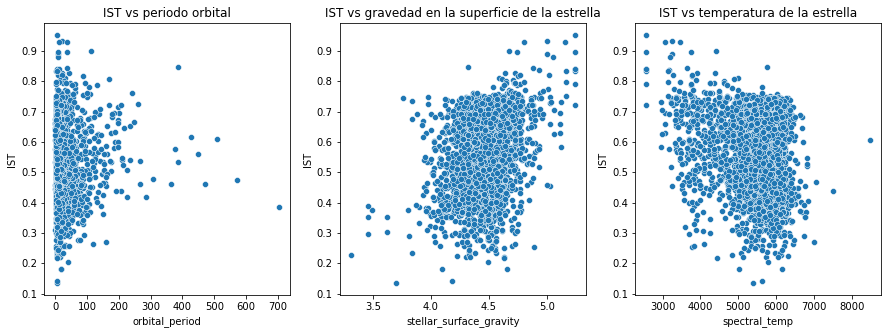

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Numeric target
sns.scatterplot(x='orbital_period', y='IST', data=data, ax=axes[0])
axes[0].set_title("IST vs periodo orbital")


# Numeric vs Numeric
sns.scatterplot(x='stellar_surface_gravity', y='IST', data=data, ax=axes[1])
axes[1].set_title("IST vs gravedad en la superficie de la estrella")

# Categorica vs target
sns.scatterplot(x='spectral_temp', y='IST', data=data, ax=axes[2])
axes[2].set_title("IST vs temperatura de la estrella");

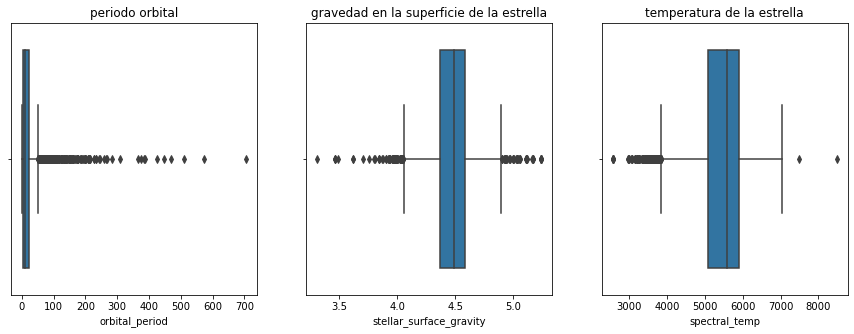

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.boxplot(x='orbital_period', data=data, ax=axes[0])
axes[0].set_title("periodo orbital")

sns.boxplot(x='stellar_surface_gravity', data=data, ax=axes[1])
axes[1].set_title("gravedad en la superficie de la estrella")

sns.boxplot(x='spectral_temp', data=data, ax=axes[2])
axes[2].set_title("temperatura de la estrella");

### Eliminamos los outliers correspondientes al periodo orbital y a la gravedad en la superficie de la estrella
Después de haber probado a eliminar más ourliers de otras variables los modelos empeoraban un poco

In [20]:
Q1_op = data.orbital_period.quantile(.25)
Q3_op = data.orbital_period.quantile(.75)
IQR_op = Q3_op - Q1_op

data = data[~(((data.orbital_period < Q1_op-1.5 * IQR_op))|(data.orbital_period > Q3_op+1.5 * IQR_op))]
len(data)

2411

In [21]:
Q1_sg = data.stellar_surface_gravity.quantile(.25)
Q3_sg = data.stellar_surface_gravity.quantile(.75)
IQR_sg = Q3_sg - Q1_sg

data = data[~(((data.stellar_surface_gravity < Q1_sg-1.5 * IQR_sg))|(data.stellar_surface_gravity > Q3_sg+1.5 * IQR_sg))]
len(data)

2304

### Comprobamos la correlación entre variables

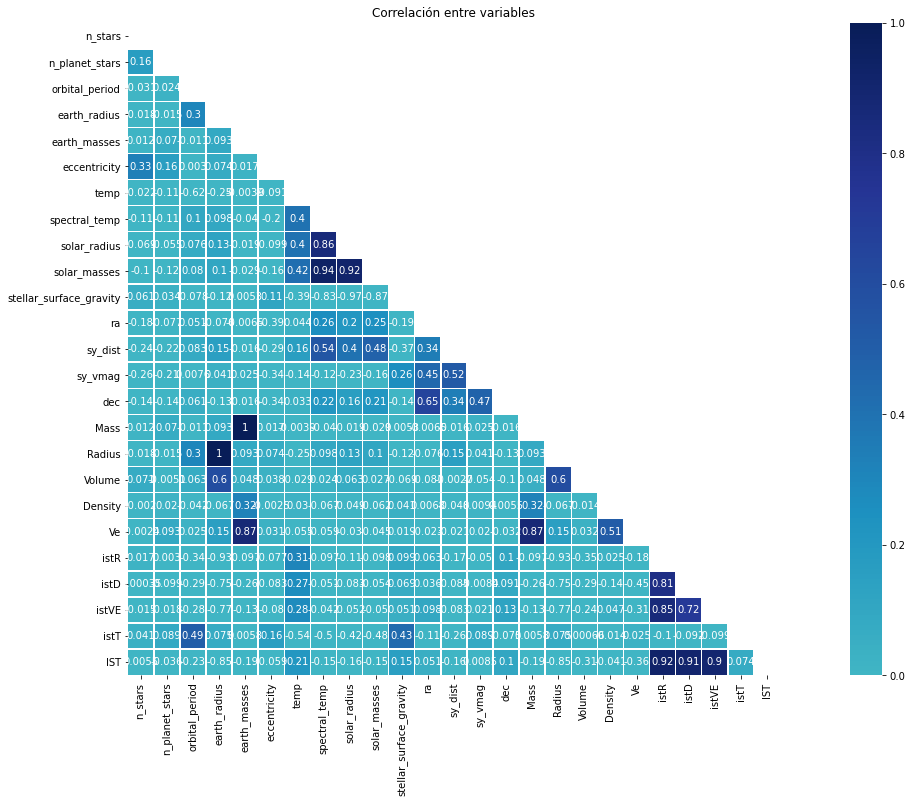

In [22]:
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,12))
sns.heatmap(data.corr(),
            annot=True,
            vmax=1,
            cmap='YlGnBu',
            mask=mask,
            vmin=0,
            center=0,
            linewidths=.5,
            square=True)

plt.title('Correlación entre variables')
plt.show();

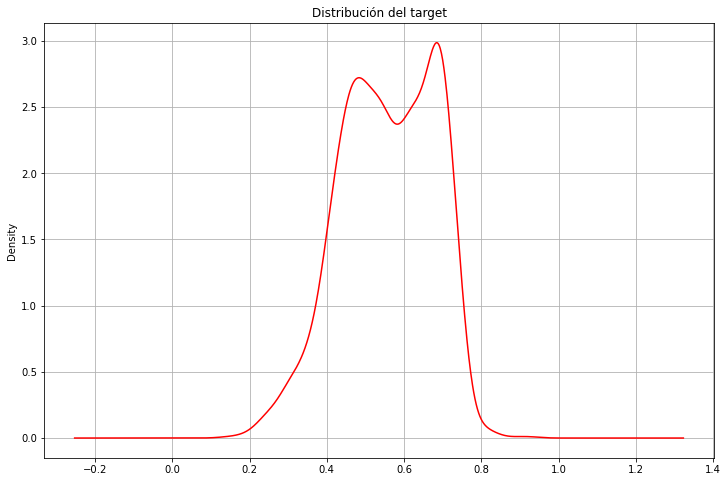

In [23]:
data.IST.plot(kind='kde',
              grid=True,
              color=['r'],
              figsize=(12,8),
              title='Distribución del target');

In [24]:
#data.to_csv('project.csv', index=False)

### Eliminamos las variables con las que hemos calculado el target y aquellas que presentan correlación entre sí

In [25]:
df_final = data.drop(['pl_name','hostname','n_planet_stars','solar_masses','earth_radius','earth_masses','solar_radius','temp','Radius','Mass', 'Volume','Density','Ve','istR','istD','istVE','istT'], axis=1)
df_final.head()

,n_stars,orbital_period,eccentricity,spectral_temp,stellar_surface_gravity,ra,sy_dist,sy_vmag,dec,IST
31,2,0.736547,0.050,5172.0,4.43,133.146837,12.5855,5.95084,28.329815,0.543958
45,1,8.463000,0.000,3700.0,4.39,311.291137,9.7221,8.81000,-31.342450,0.296197
46,1,18.859019,0.000,3700.0,4.57,311.291137,9.7221,8.81000,-31.342450,0.398228
93,1,9.755980,0.077,5939.0,4.36,280.667139,627.1580,13.82000,6.219167,0.322950
95,1,5.113400,0.000,4950.0,4.55,101.922543,591.5550,15.38300,-3.719289,0.408701


### Normalizamos los datos 
Utilizamos el MinMaxScaler para que los valores nos queden entre 0 y 1

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [27]:
df_final.n_stars = MinMaxScaler().fit_transform(df_final.n_stars.values.reshape(-1, 1))
df_final.orbital_period = MinMaxScaler().fit_transform(df_final.orbital_period.values.reshape(-1, 1))
df_final.spectral_temp = MinMaxScaler().fit_transform(df_final.spectral_temp.values.reshape(-1, 1))
#df_final.solar_masses = StandardScaler().fit_transform(df_final.solar_masses.values.reshape(-1, 1))
df_final.stellar_surface_gravity = MinMaxScaler().fit_transform(df_final.stellar_surface_gravity.values.reshape(-1, 1))
df_final.sy_vmag = MinMaxScaler().fit_transform(df_final.sy_vmag.values.reshape(-1, 1))
df_final.dec = MinMaxScaler().fit_transform(df_final.dec.values.reshape(-1, 1))
df_final.ra = MinMaxScaler().fit_transform(df_final.ra.values.reshape(-1, 1))
df_final.sy_dist = MinMaxScaler().fit_transform(df_final.sy_dist.values.reshape(-1, 1))

### Distribuimos los datos en train y test

In [28]:
X = df_final.drop('IST', axis=1)
y = df_final['IST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape

((1843, 9), (461, 9))

In [30]:
X_train.columns

Index(['n_stars', 'orbital_period', 'eccentricity', 'spectral_temp',
       'stellar_surface_gravity', 'ra', 'sy_dist', 'sy_vmag', 'dec'],
      dtype='object')

### Entrenamos los modelos para la regresión

In [31]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.svm import SVR 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

linreg = LinearRegression()
sgdr = SGDRegressor()
svm = SVR()
rfr = RandomForestRegressor()
knn = KNeighborsRegressor()
gbr = GradientBoostingRegressor()

clasificadores = {
                  'Regresión lineal': linreg,
                  'Gradiente descentente': sgdr,
                  'SVM': svm,
                  'KNeighbors ': knn,
                  'Random Forest': rfr,
                  'Gradient Boosting': rfr}


# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)

CREANDO MODELO: Regresión lineal
CREANDO MODELO: Gradiente descentente
CREANDO MODELO: SVM
CREANDO MODELO: KNeighbors 
CREANDO MODELO: Random Forest
CREANDO MODELO: Gradient Boosting


### Calculamos las méricas correspondientes

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(model, name, X_train, y_train, X_test, y_test):
    """
    Función de devuelve en un diccionario las métricas de evaluación de 
    Accuracy, Precision, Recall y R2 para los conjuntos de datos de entrenamiento y test
        model: modelo a evaluar
        name: nombre del modelo
        X_train: Variables de entrada del conjunto de datos de entrenamiento
        y_train: Variable de salida del conjunto de datos de entrenamiento
        X_test: Variables de entrada del conjunto de datos de test
        y_test: Variable de salida del conjunto de datos de test
        return: diccionario con el nombre del modelo y el valor de las métricas
    """
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_dict['mse_train'] = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
    model_dict['mse_tests'] = mean_squared_error(y_true=y_test, y_pred=y_pred_test)
    model_dict['mae_train'] = mean_absolute_error(y_true=y_train, y_pred=y_pred_train)
    model_dict['mae_tests'] = mean_absolute_error(y_true=y_test, y_pred=y_pred_test)
    model_dict['r2_train'] = r2_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['r2_tests'] = r2_score(y_true=y_test, y_pred=y_pred_test)
    
    return model_dict


# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 X_train=X_train, y_train=y_train,
                                 X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

,mse_train,mse_tests,mae_train,mae_tests,r2_train,r2_tests
name,,,,,,
Regresión lineal,0.012988,0.013262,0.093189,0.096527,0.129543,0.065759
Gradiente descentente,0.014528,0.014286,0.099572,0.101463,0.026321,-0.006354
SVM,0.010287,0.011670,0.082032,0.088613,0.310576,0.177902
KNeighbors,0.008699,0.013781,0.072343,0.093979,0.417025,0.029245
Random Forest,0.001514,0.011286,0.030613,0.085961,0.898545,0.204965
Gradient Boosting,0.001514,0.011286,0.030613,0.085961,0.898545,0.204965


Podemos observar que las métricas son bastante bajas por lo que la regresión para este problema no es adecuada, seguramente harían falta muchos más datos y otras varaibles de las que no disponemos como la distancia del planeta a su estrella

# Clasificación

##### Aplicamos la segmentacíon adecuada: los que tienen un ESI superior a 0,8 apuntan a que son planetas de superficie rocosa y con temperatura similar a la de nuestro planeta aunque vamos a tomar una referencia en 0.7 debido a que los datos quedarían demasiado desbalanceados

In [33]:
df_final['IST'] = df_final.IST.apply(lambda x: 1 if x >= 0.7 else 0)

In [34]:
df_final.head() # Datos normalizados

,n_stars,orbital_period,eccentricity,spectral_temp,stellar_surface_gravity,ra,sy_dist,sy_vmag,dec,IST
31,0.5,0.008900,0.050,0.371581,0.445783,0.367933,0.002689,0.127655,0.675254,0
45,0.0,0.159632,0.000,0.091945,0.397590,0.877875,0.001860,0.343515,0.329238,0
46,0.0,0.362443,0.000,0.091945,0.614458,0.877875,0.001860,0.343515,0.329238,0
93,0.0,0.184856,0.077,0.517287,0.361446,0.790213,0.180454,0.721760,0.547043,0
95,0.0,0.094286,0.000,0.329407,0.590361,0.278552,0.170156,0.839763,0.489414,0


#### Dividimos en train y test

In [35]:
X = df_final.drop('IST', axis=1)
y = df_final['IST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Como los datos están bastante desbalaceados aplicamos un smote

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Smote')

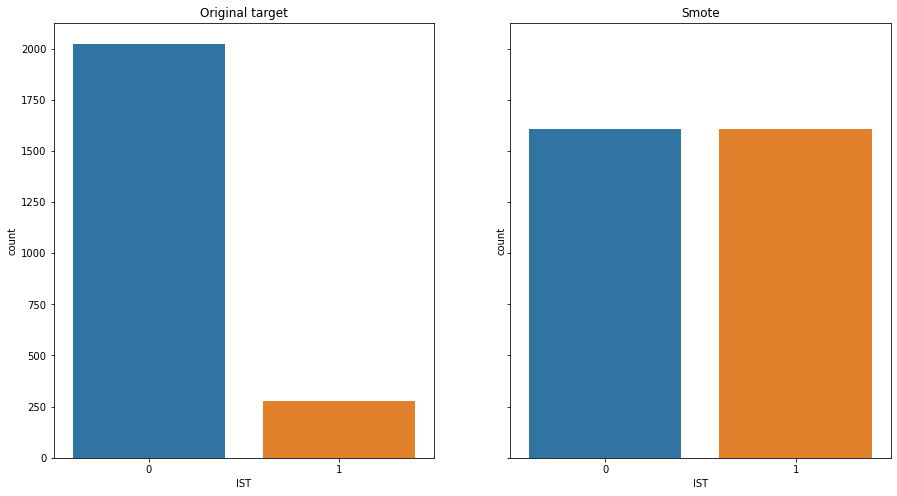

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Original target
sns.countplot(x="IST", data=df_final, ax=axes[0])
axes[0].set_title("Original target")

# Smote
sns.countplot(y_sm, ax=axes[1])
axes[1].set_title("Smote")

### Entrenamos los modelos de clasificación

In [38]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

bnb = BernoulliNB()
lr = LogisticRegression()
svm = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
gbc = GradientBoostingClassifier()

clasificadores = {
                  'Bernoulli NB': bnb,
                  'Regresion Logistica': lr,
                  'SVM': svm,
                  'KNeighbors Classifier': knn,
                  'Random Forest': rfc,
                  'GradientBoostingClassifier': gbc}


# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_sm, y_sm)

CREANDO MODELO: Bernoulli NB
CREANDO MODELO: Regresion Logistica
CREANDO MODELO: SVM
CREANDO MODELO: KNeighbors Classifier
CREANDO MODELO: Random Forest
CREANDO MODELO: GradientBoostingClassifier


### Calculamos sus métricas correspondientes

In [39]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

def evaluation(model, name, X_train, y_train, X_test, y_test):
    """
    Función de devuelve en un diccionario las métricas de evaluación de 
    Accuracy, Precision, Recall y F1 para los conjuntos de datos de entrenamiento y test
        model: modelo a evaluar
        name: nombre del modelo
        X_train: Variables de entrada del conjunto de datos de entrenamiento
        y_train: Variable de salida del conjunto de datos de entrenamiento
        X_test: Variables de entrada del conjunto de datos de test
        y_test: Variable de salida del conjunto de datos de test
        return: diccionario con el nombre del modelo y el valor de las métricas
    """
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test)
    
    return model_dict


# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 X_train=X_sm, y_train=y_sm,
                                 X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests
name,,,,,,,,
Bernoulli NB,0.518645,0.865510,0.647059,0.055556,0.082039,0.021739,0.145615,0.031250
Regresion Logistica,0.639838,0.622560,0.633136,0.152174,0.665009,0.608696,0.648681,0.243478
SVM,0.743940,0.661605,0.706037,0.194444,0.835923,0.760870,0.765509,0.309735
KNeighbors Classifier,0.929770,0.735358,0.881412,0.177966,0.993163,0.456522,0.933957,0.256098
Random Forest,1.000000,0.839479,1.000000,0.300000,1.000000,0.456522,1.000000,0.362069
GradientBoostingClassifier,0.876321,0.759219,0.835457,0.240000,0.937228,0.652174,0.883421,0.350877


Para el caso de la clasificación las métricas siguen saliendo bastante bajas incluso habiendo modificado el criterio de selección (de 0.8 a 0.7), por lo que al igual que en el caso de la regresión este problema definitivamente no es adecuado para un proyecto de machine learning

### Pintamos las matrices de confusión

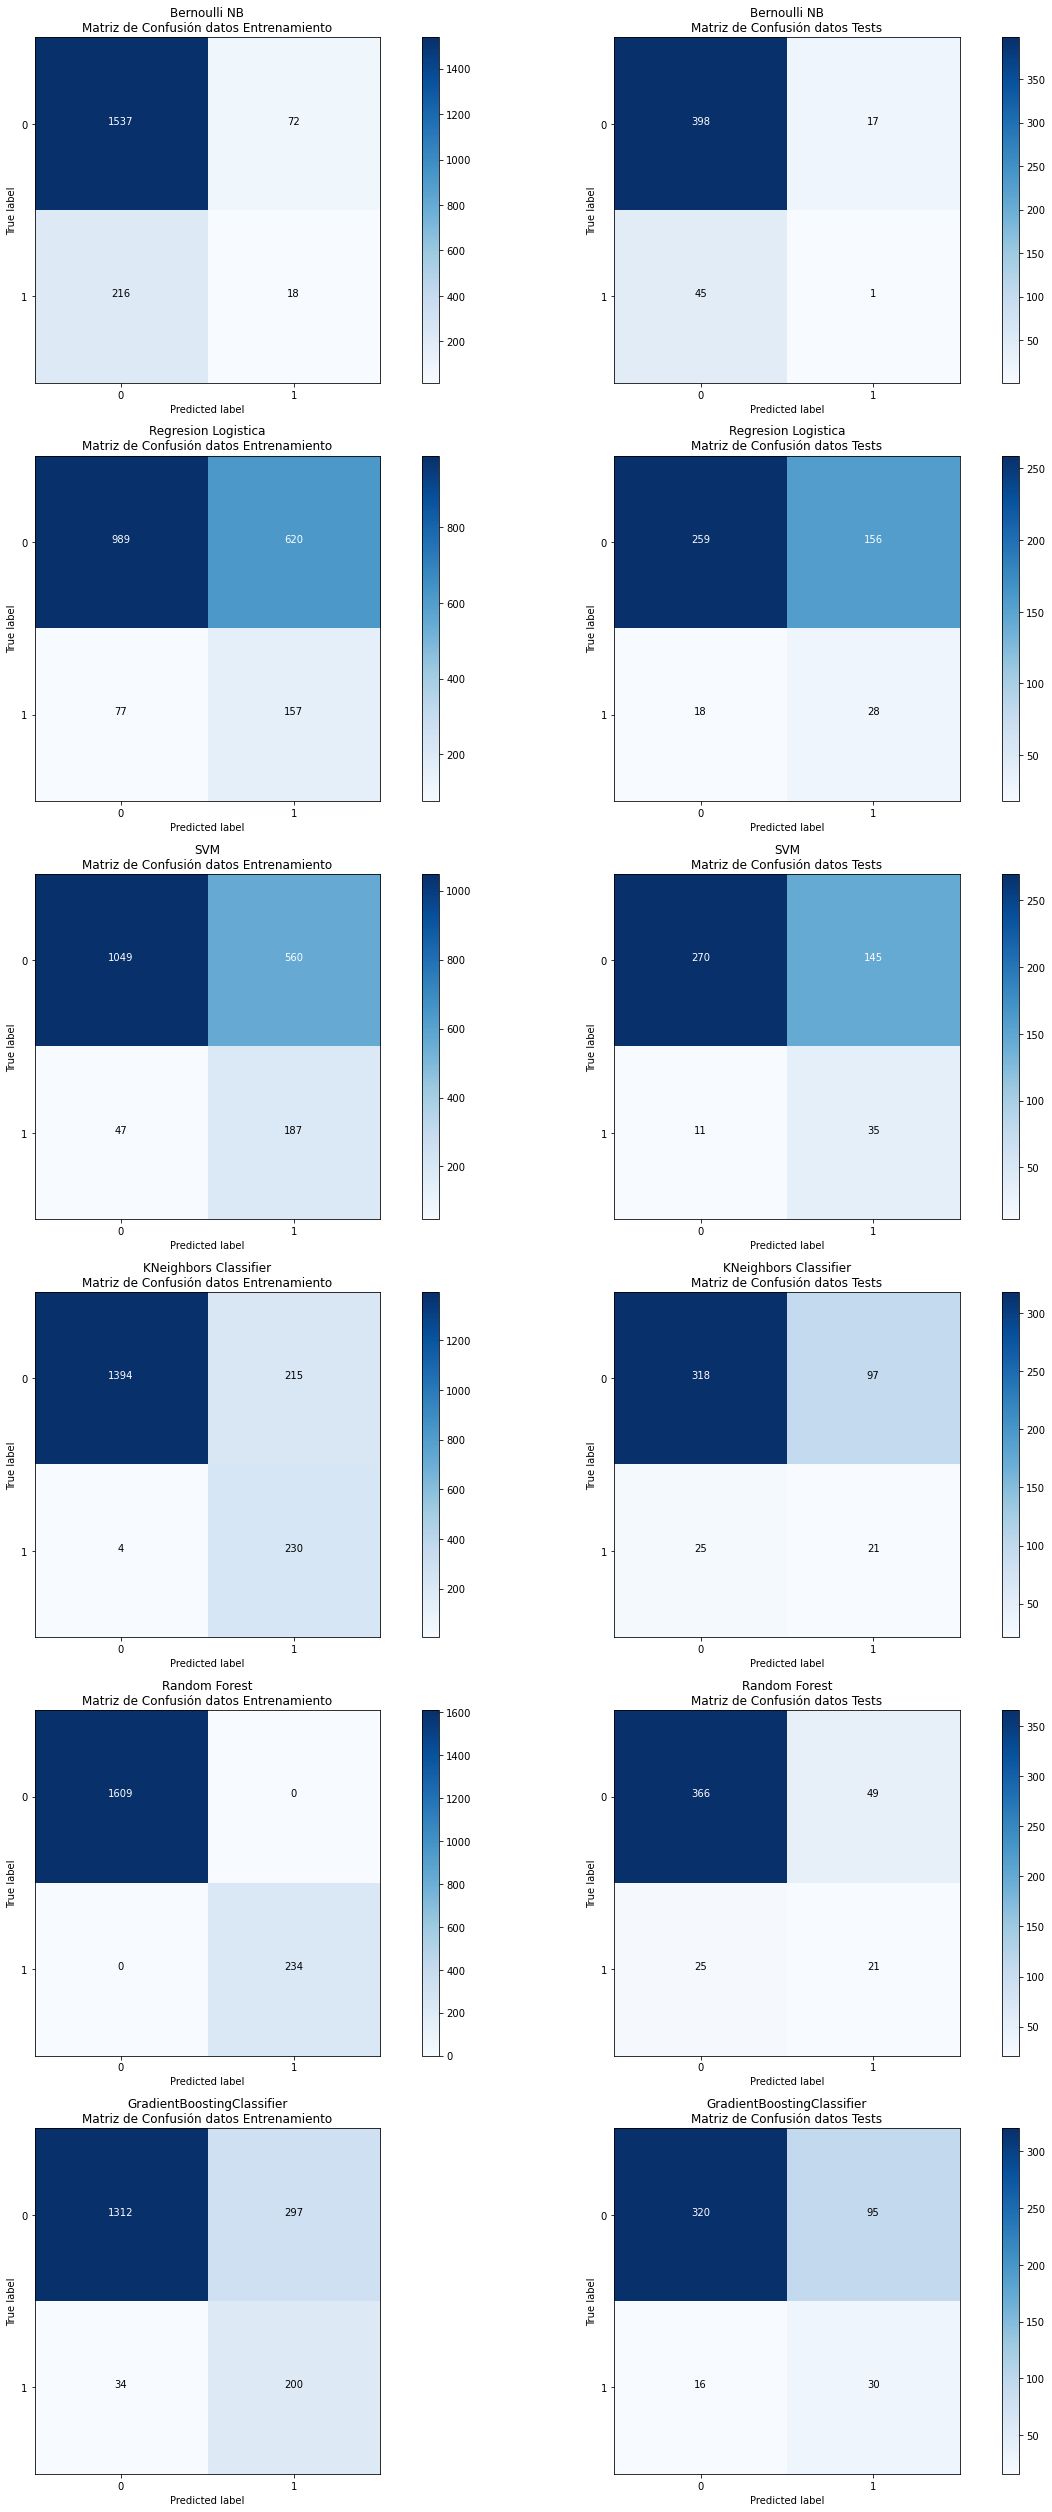

In [40]:
import itertools

from sklearn.metrics import confusion_matrix

polaridad = [0, 1]

# Obtenemos las Matrices de confusión
msc = []
for k, v in clasificadores.items():
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train, labels=polaridad)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test, labels=polaridad)
    msc.append(model)

    
# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    Función que dibuja una matriz de confusión.
    Args:
        cm: confusion matrix
        classes: clases del target
        title: título del gráfico
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(20, 35))
pos = 0
for mc in msc:
    pos += 1
    plt.subplot(len(msc), 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=polaridad, 
                          title='{}\nMatriz de Confusión datos Entrenamiento'.format(mc['name']))
    pos += 1
    plt.subplot(len(msc), 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=polaridad, 
                          title='{}\nMatriz de Confusión datos Tests'.format(mc['name'] ))
plt.show()